In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os

In [22]:
depth, Te = np.array([]), np.array([])
grid = 0
Mrk509_all = 'sed3_temp'
Mrk509_noIR = 'Mrk509_noIR_temp'

agn_all_txt =  'Mrk509 all region'
agn_noIR_txt = 'Mrk509 without the IR region'
#agn3_txt = 'Mrk509.sed'

# Define number of values 
hden = np.logspace(-5, 15, 21) #np.linspace(1, 15, 15)
xi = np.logspace(-1, 6, 8) # np.arange(1, xi_len+1)
hden_len = len(hden)
xi_len = len(xi)
Te_agn1 = 1.048e04
Te_agn2 = 1.219e4 #2.012e04
Te_agn3 = 1.239e4

In [5]:
file = open('AGN_0630/' + Mrk509_all + '.txt') # hden goes from 1~15
file.readline()
for line in file:
    line = line.rstrip('\n')
    line = line.split('\t')
    try:
        depth = np.append(depth, float(line[0]))
        Te = np.append(Te, float(line[1]))
    except:
        depth = np.append(depth, str(line))
        Te = np.append(Te, str(line))
        grid += 1
        
listOfLists_depth = [[] for i in range(grid)]
listOfLists_Te = [[] for i in range(grid)]
index = 0
for i in range(len(depth)):
    try:
        listOfLists_depth[index].append(float(depth[i]))
        listOfLists_Te[index].append(float(Te[i]))
    except ValueError:
        index += 1
        
file = open('AGN_0630/' + Mrk509_all + '_avg.txt')
file.readline()
avg_temp = np.array([])
for line in file:
    line = line.rstrip('\n')
    line = line.split('\t')
    try:
        avg_temp = np.append(avg_temp, float(line[1]))
    except IndexError: # Skips the raws of strings (=grids)
        pass
avg_temp_split_all = np.array_split(list(avg_temp), xi_len)

In [6]:
file = open('AGN_0630/' + Mrk509_noIR + '.txt') # hden goes from 1~15
file.readline()
for line in file:
    line = line.rstrip('\n')
    line = line.split('\t')
    try:
        depth = np.append(depth, float(line[0]))
        Te = np.append(Te, float(line[1]))
    except:
        depth = np.append(depth, str(line))
        Te = np.append(Te, str(line))
        grid += 1
        
listOfLists_depth_noIR = [[] for i in range(grid)]
listOfLists_Te_noIR = [[] for i in range(grid)]
index = 0
for i in range(len(depth)):
    try:
        listOfLists_depth_noIR[index].append(float(depth[i]))
        listOfLists_Te_noIR[index].append(float(Te[i]))
    except ValueError:
        index += 1
        
file = open('AGN_0630/' + Mrk509_noIR + '_avg.txt')
file.readline()
avg_temp = np.array([])
for line in file:
    line = line.rstrip('\n')
    line = line.split('\t')
    try:
        avg_temp = np.append(avg_temp, float(line[1]))
    except IndexError: # Skips the raws of strings (=grids)
        pass
avg_temp_split_noIR = np.array_split(list(avg_temp), xi_len)

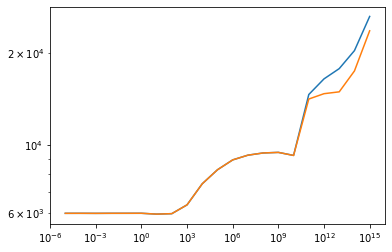

In [7]:
plt.xscale('log')
plt.yscale('log')
plt.plot(hden, avg_temp_split_all[0])
plt.plot(hden, avg_temp_split_noIR[0])

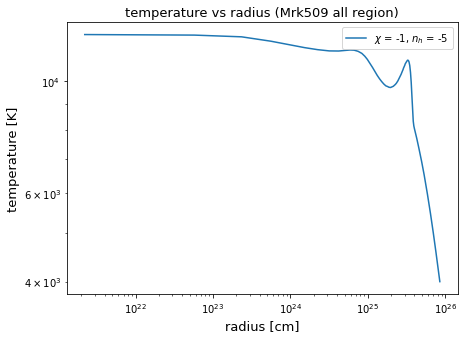

In [26]:
fig, ax = plt.subplots(figsize=(7, 5))
plt.title('temperature vs radius (' + str(agn_all_txt) + ')' , fontsize=13)
plt.xlabel('radius [cm]', fontsize=13)
plt.ylabel('temperature [K]', fontsize=13)
plt.xscale('log')
plt.yscale('log')
#plt.axhline(y=Te_agn1, color='hotpink', linestyle='-', label='output (single)')
plt.plot(listOfLists_depth[0], listOfLists_Te[0], label='$\chi$ = -1, $n_h$ = -5')
plt.legend()

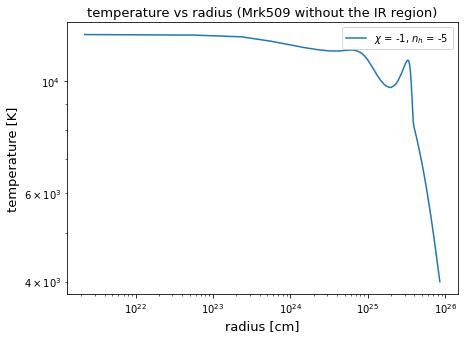

In [27]:
fig, ax = plt.subplots(figsize=(7, 5))
#ax.set(title='temperature vs radius (T =1.5e5 k, a(ox) = -1.4, a(uv)=-0.5 a(x)=-1)')#, xlabel='radius [cm]', ylabel='temperature [K]')
plt.title('temperature vs radius (' + str(agn_noIR_txt) + ')' , fontsize=13)
plt.xlabel('radius [cm]', fontsize=13)
plt.ylabel('temperature [K]', fontsize=13)
plt.xscale('log')
plt.yscale('log')
#plt.axhline(y=Te_agn1, color='hotpink', linestyle='-', label='output (single)')
plt.plot(listOfLists_depth_noIR[0], listOfLists_Te_noIR[0], label='$\chi$ = -1, $n_h$ = -5')
plt.legend()

In [28]:
# Below creates the plot of average temperature vs number density

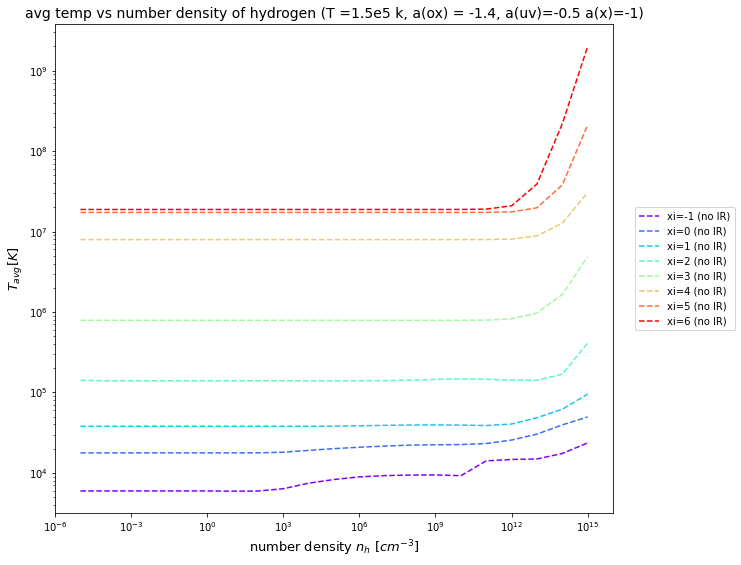

In [32]:
fig, ax = plt.subplots(figsize=(10, 9))
plt.title('avg temp vs number density of hydrogen (' + str(agn1_txt) + ')', fontsize=14)
plt.xlabel('number density $n_h$ [$cm^{-3}$]', fontsize=13)
plt.ylabel('$T_{avg} [K]$', fontsize=13)
plt.xscale('log')
plt.yscale('log')
colors = plt.cm.rainbow(np.linspace(0, 1, len(avg_temp_split_noIR)))
for i in range(len(xi)):
    row = np.array(avg_temp_split_noIR[i])
    index, = np.where(row != 1e-30)
    if len(index) == len(row):
        #print("List is not empty")
        plt.plot(hden, row, color=colors[i], label= 'xi='  + str(i-1) + ' (no IR)', linestyle = '--')
    else:
        #print(index)
        pass
        plt.plot(hden[index], row[index], color=colors[i], label= 'xi=' + str(i-1) + ' (no IR)', linestyle = '--')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

In [100]:
T_ratio = np.exp(np.diff(np.log(avg_temp_split_all)))
T_ratio_noIR = np.exp(np.diff(np.log(avg_temp_split_noIR)))

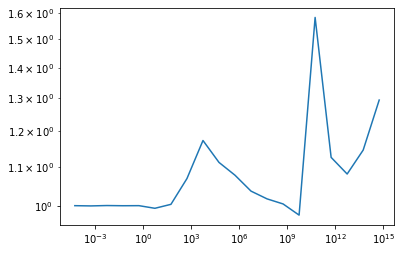

In [101]:
plt.xscale('log')
plt.yscale('log')
plt.plot((hden[1:] + hden[:-1]) / 2, T_ratio[0])

In [94]:
n_transition, te_transition = np.array([]), np.array([])
for index in range(0, len(avg_temp_split_all)):
    #T_ratio = np.append(T_ratio, avg_temp_split_all[index][i+1]/avg_temp_split_all[index][i])
    i = 0
    while True:
        i += 1
        if avg_temp_split_all[index][i+1]/avg_temp_split_all[index][i] * 100 >= 110.:
            #print(avg_temp_split_all[index][i+1]/avg_temp_split_all[index][i] * 100)
            n_transition = np.append(n_transition, hden[i])
            te_transition = np.append(te_transition, avg_temp_split_all[index][i])
            break

n_transition_noIR, te_transition_noIR = np.array([]), np.array([])
for index in range(0, len(avg_temp_split_noIR)):
    #T_ratio_noIR = np.append(T_ratio_noIR, avg_temp_split_noIR[index][i+1]/avg_temp_split_noIR[index][i])
    i = 0
    while True:
        i += 1
        if avg_temp_split_noIR[index][i+1]/avg_temp_split_noIR[index][i] * 100 >= 110.:
            #print(avg_temp_split_noIR[index][i+1]/avg_temp_split_noIR[index][i] * 100)
            n_transition_noIR = np.append(n_transition_noIR, hden[i])
            te_transition_noIR = np.append(te_transition_noIR, avg_temp_split_noIR[index][i])
            #T_ratio_noIR = np.append(T_ratio_noIR, avg_temp_split_noIR[index][i+1]/avg_temp_split_noIR[index][i])
            break

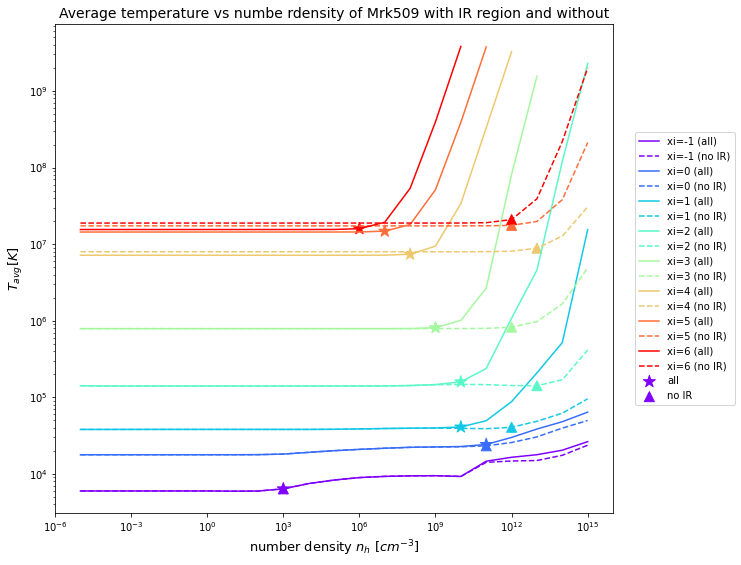

In [95]:
fig, ax = plt.subplots(figsize=(10, 9))
plt.title('Average temperature vs numbe rdensity of Mrk509 with IR region and without', fontsize=14)
plt.xlabel('number density $n_h$ [$cm^{-3}$]', fontsize=13)
plt.ylabel('$T_{avg} [K]$', fontsize=13)
plt.xscale('log')
plt.yscale('log')
colors = plt.cm.rainbow(np.linspace(0, 1, len(avg_temp_split_all)))
for i in range(len(xi)):
    row = np.array(avg_temp_split_all[i])
    index, = np.where(row != 1e-30)
    
    if len(index) == len(row):
        plt.plot(hden, row, color=colors[i], label= 'xi='  + str(i-1) + ' (all)' ) 
    else:
        i_1e30, = np.where(row == 1e-30)
        end = i_1e30[0]
        plt.plot(hden[index], row[0:end], color=colors[i], label= 'xi=' + str(i-1) + ' (all)')

    row_noIR = np.array(avg_temp_split_noIR[i])
    index_noIR, = np.where(row_noIR != 1e-30)
    if len(index_noIR) == len(row_noIR):
        plt.plot(hden, row_noIR, color=colors[i], label= 'xi='  + str(i-1) + ' (no IR)', linestyle = '--')  
    else:
        i_1e30_noIR, = np.where(row_noIR == 1e-30)
        end_noIR = i_1e30_noIR[0]
        plt.plot(hden[index_noIR], row_noIR[0:end_noIR], color=colors[i], label= 'xi=' + str(i-1) + ' (no IR)', linestyle = '--')

plt.scatter(n_transition, te_transition, color=colors, marker='*', s=160, label='all')    
plt.scatter(n_transition_noIR, te_transition_noIR, color=colors, marker='^', s=100, label='no IR')    
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

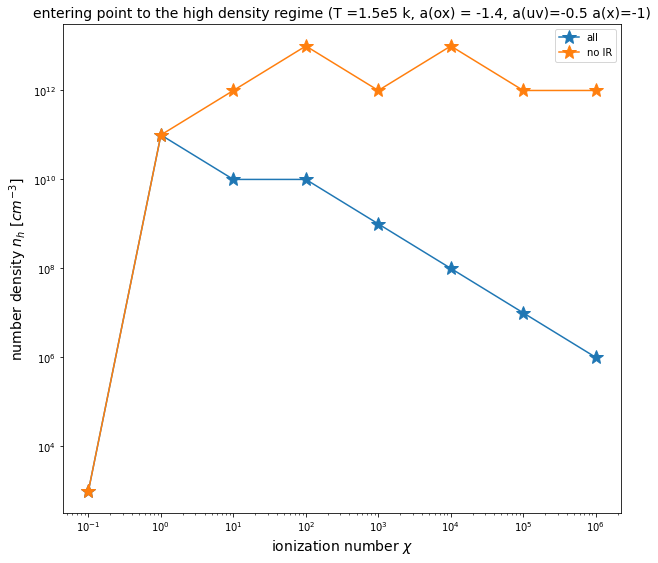

In [96]:
fig, ax = plt.subplots(figsize=(10, 9))
plt.title('entering point to the high density regime (' + str(agn1_txt) + ')', fontsize=14)
plt.xlabel('ionization number $\chi$', fontsize=14)
plt.ylabel('number density $n_h$ [$cm^{-3}$]', fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.plot(xi, n_transition, marker='*', markersize=15, label='all')
plt.plot(xi, n_transition_noIR, marker='*', markersize=15, label='no IR')
plt.legend()

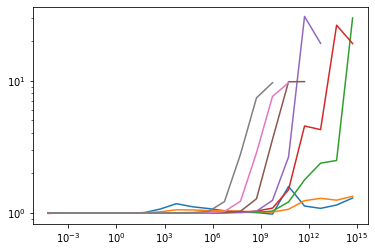

In [181]:
plt.xscale('log')
plt.yscale('log')
plt.plot(hden_ratio, T_ratio[0])
plt.plot(hden_ratio, T_ratio[1])
plt.plot(hden_ratio, T_ratio[2])
plt.plot(hden_ratio, T_ratio[3])
plt.plot(hden_ratio[0:18], T_ratio[4][0:18])
plt.plot(hden_ratio[0:17], T_ratio[5][0:17])
plt.plot(hden_ratio[0:16], T_ratio[6][0:16])
plt.plot(hden_ratio[0:15], T_ratio[7][0:15])

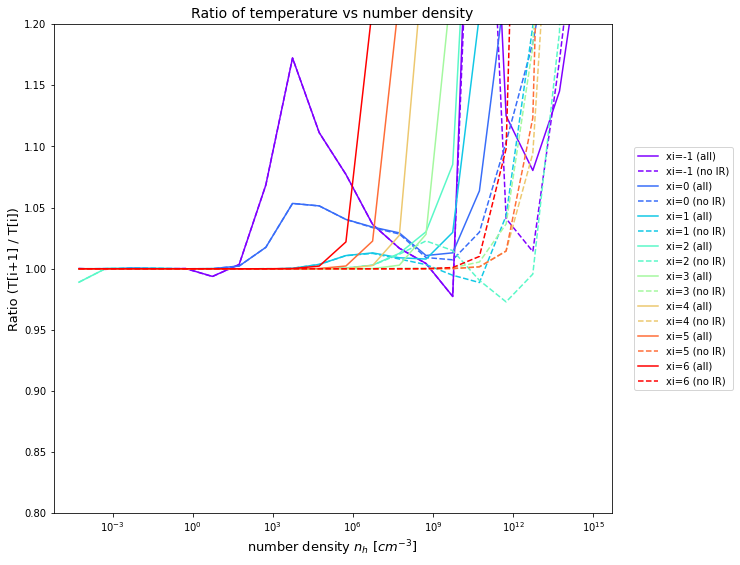

In [188]:
fig, ax = plt.subplots(figsize=(10, 9))
plt.title('Ratio of temperature vs number density', fontsize=14)
plt.xlabel('number density $n_h$ [$cm^{-3}$]', fontsize=13)
plt.ylabel('Ratio (T[i+1] / T[i])', fontsize=13)
plt.xscale('log')
plt.ylim(0.8, 1.2)
#plt.yscale('log')
colors = plt.cm.rainbow(np.linspace(0, 1, len(T_ratio)))
for i in range(len(T_ratio)):
    ratio_i, = np.where(T_ratio[i] > 1e-39)
    if len (ratio_i) == len(T_ratio[i]):
        plt.plot(hden_ratio, T_ratio[i], color=colors[i],label= 'xi=' + str(i-1) + ' (all)')
    else:
        else_i, = np.where(T_ratio[i] < 1e-39)
        plt.plot(hden_ratio[0:else_i[0]], T_ratio[i][0:else_i[0]], color=colors[i], label= 'xi=' + str(i-1) + ' (all)')
        
    ratio_i_noIR, = np.where(T_ratio_noIR[i] > 1e-39)
    if len (ratio_i_noIR) == len(T_ratio_noIR[i]):
        plt.plot(hden_ratio, T_ratio_noIR[i], color=colors[i],label= 'xi=' + str(i-1) + ' (no IR)', linestyle='--')
    else:
        else_i_noIR, = np.where(T_ratio_noIR[i] < 1e-39)
        plt.plot(hden_ratio[0:else_i[0]], T_ratio_noIR[i][0:else_i_noIR[0]], color=colors[i], label= 'xi=' + str(i-1) + ' (no IR)', linestyle='--')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

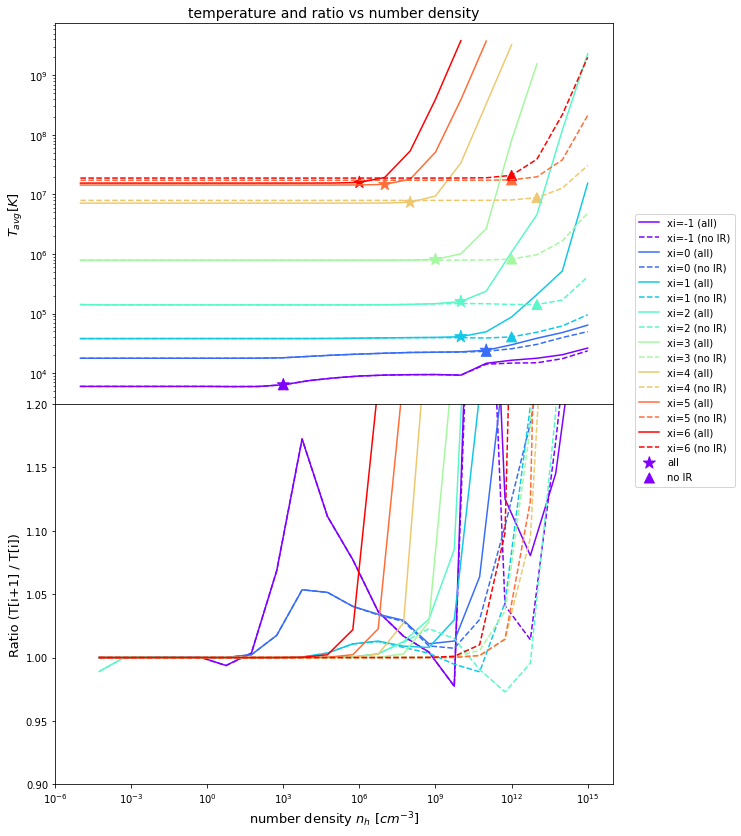

In [225]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10,14))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)
axs[0].set_title('temperature and ratio vs number density', fontsize=14)
plt.xlabel('number density $n_h$ [$cm^{-3}$]', fontsize=13)
axs[0].set_ylabel('$T_{avg} [K]$', fontsize=13)
axs[0].set_xscale('log')
axs[0].set_yscale('log')
colors = plt.cm.rainbow(np.linspace(0, 1, len(avg_temp_split_all)))
for i in range(len(xi)):
    row = np.array(avg_temp_split_all[i])
    index, = np.where(row != 1e-30)
    
    if len(index) == len(row):
        axs[0].plot(hden, row, color=colors[i], label= 'xi='  + str(i-1) + ' (all)' ) 
    else:
        i_1e30, = np.where(row == 1e-30)
        end = i_1e30[0]
        axs[0].plot(hden[index], row[0:end], color=colors[i], label= 'xi=' + str(i-1) + ' (all)')

    row_noIR = np.array(avg_temp_split_noIR[i])
    index_noIR, = np.where(row_noIR != 1e-30)
    if len(index_noIR) == len(row_noIR):
        axs[0].plot(hden, row_noIR, color=colors[i], label= 'xi='  + str(i-1) + ' (no IR)', linestyle = '--')  
    else:
        i_1e30_noIR, = np.where(row_noIR == 1e-30)
        end_noIR = i_1e30_noIR[0]
        axs[0].plot(hden[index_noIR], row_noIR[0:end_noIR], color=colors[i], label= 'xi=' + str(i-1) + ' (no IR)', linestyle = '--')
axs[0].scatter(n_transition, te_transition, color=colors, marker='*', s=160, label='all')    
axs[0].scatter(n_transition_noIR, te_transition_noIR, color=colors, marker='^', s=100, label='no IR')    
axs[0].legend(bbox_to_anchor=(1.04,0.5), loc="upper left", borderaxespad=0)

axs[1].set_xscale('log')
axs[1].set_ylim(0.9, 1.2)
axs[1].set_ylabel('Ratio (T[i+1] / T[i])', fontsize=13)

colors = plt.cm.rainbow(np.linspace(0, 1, len(T_ratio)))
for i in range(len(T_ratio)):
    ratio_i, = np.where(T_ratio[i] > 1e-39)
    if len (ratio_i) == len(T_ratio[i]):
        axs[1].plot(hden_ratio, T_ratio[i], color=colors[i],label= 'xi=' + str(i-1) + ' (all)')
    else:
        else_i, = np.where(T_ratio[i] < 1e-39)
        axs[1].plot(hden_ratio[0:else_i[0]], T_ratio[i][0:else_i[0]], color=colors[i], label= 'xi=' + str(i-1) + ' (all)')
        
    ratio_i_noIR, = np.where(T_ratio_noIR[i] > 1e-39)
    if len (ratio_i_noIR) == len(T_ratio_noIR[i]):
        axs[1].plot(hden_ratio, T_ratio_noIR[i], color=colors[i],label= 'xi=' + str(i-1) + ' (no IR)', linestyle='--')
    else:
        else_i_noIR, = np.where(T_ratio_noIR[i] < 1e-39)
        axs[1].plot(hden_ratio[0:else_i[0]], T_ratio_noIR[i][0:else_i_noIR[0]], color=colors[i], label= 'xi=' + str(i-1) + ' (no IR)', linestyle='--')
        

In [52]:
listOfLists_max = np.array([])
for i in listOfLists_Te:
    listOfLists_max = np.append(listOfLists_max, np.max(i))
temp_max_split = np.array_split(list(listOfLists_max), xi_len)

listOfLists_max_noIR = np.array([])
for i in listOfLists_Te_noIR:
    listOfLists_max_noIR = np.append(listOfLists_max_noIR, np.max(i))
temp_max_split_noIR = np.array_split(list(listOfLists_max_noIR), xi_len)

In [ ]:
row = np.array(avg_temp_split_all[i])
index, = np.where(row != 1e-30)

if len(index) == len(row):
    plt.plot(hden, row, color=colors[i], label= 'xi='  + str(i-1) + ' (all)' ) 
else:
    i_1e30, = np.where(row == 1e-30)
    end = i_1e30[0]
    plt.plot(hden[index], row[0:end], color=colors[i], label= 'xi=' + str(i-1) + ' (all)')

In [43]:
max_i = np.where(temp_max_split[0] > 1e9)

In [48]:
for i in range(len(xi)):
    row_max = np.array(temp_max_split[i])
    index_max, = np.where(row_max > 1e9)
    if not index_max.all:
        print(index_max)

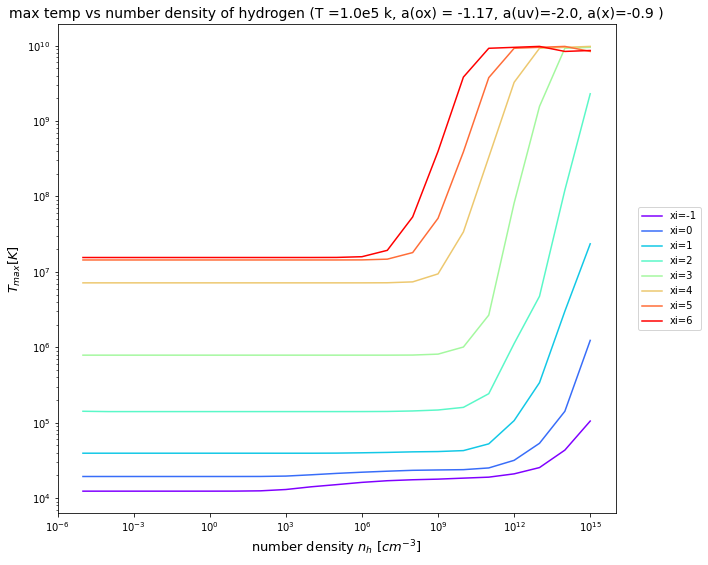

In [37]:
fig, ax = plt.subplots(figsize=(10, 9))
plt.title('max temp vs number density of hydrogen (' + str(agn2_txt) + ')', fontsize=14)
plt.xlabel('number density $n_h$ [$cm^{-3}$]', fontsize=13)
plt.ylabel('$T_{max} [K]$', fontsize=13)

plt.xscale('log')
plt.yscale('log')
colors = plt.cm.rainbow(np.linspace(0, 1, len(temp_max_split)))

for i in range(len(xi)):
    row_max = np.array(temp_max_split[i])
    index_max, = np.where(row_max > 1e9)
    
    plt.plot(hden, temp_max_split[i], color=colors[i], label='xi=' + str(i-1))
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

In [193]:
avg_temp_split = avg_temp_split_all